# Datasets
> Example of datasets to train generative models on

In [ ]:
#| default_exp data.datasets

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2
from nbdev.showdoc import *


In [ ]:
#| export
import pandas as pd
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch
from matplotlib import pyplot as plt


/Users/syl20/mambaforge/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#| export
class ImageDataset(Dataset):
    " Base class for image datasets providing visualization of (image, label) samples"

    def show(self,
        index:int # Index of the (image,label) sample to visualize
        ):
        X, y = self.__getitem__(index)
        plt.figure(figsize = (1, 1))
        plt.imshow(X.numpy().reshape(28,28),cmap='gray')
        plt.title(f"Label: {int(y)}")
        plt.show()

In [ ]:
#| export

class MnistDataset(ImageDataset):
    "MNIST digit dataset"

    def __init__(self,
        data_root:str='~/Data', # Path to data root folder
        train=True, # Training (True) or Validation set(False),
        transform=torchvision.transforms.ToTensor()
        ):
        super().__init__()
        self.ds = torchvision.datasets.MNIST(
            data_root,
            train = train,
            transform=transform, 
            download=True
        )
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        x = self.ds[idx][0].squeeze(0).flatten()
        return x, self.ds.targets[idx]

Number of samples in the dataset: 10000
Shape of image: torch.Size([784]), corresponding digit: 7
types: torch.FloatTensor, torch.LongTensor


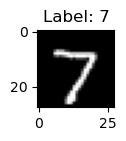

In [ ]:
ds = MnistDataset('~/Data', train=False)
print(f"Number of samples in the dataset: {len(ds)}")
X,y = ds[0]
print(f"Shape of image: {X.shape}, corresponding digit: {int(y)}")
print(f"types: {X.type()}, {y.type()}")

ds.show(0)

In [ ]:
#| export

class FashionMnistDataset(ImageDataset):
    "Fashion MNIST Dataset"
    
    def __init__(self, 
        csv_file:str # Path to csv data file
        ):
        super().__init__()
        # read csv
        self.train = pd.read_csv(csv_file)
        # normalize data
        X = self.train.iloc[:,1:].values / 255.
        X = (X-0.5)/0.5
        Y = self.train.iloc[:,0].values
        # convert X to FloatTensor & Y to LongTensor
        self.X, self.Y = torch.tensor(X, dtype=torch.float32) , torch.tensor(Y, dtype=torch.int64)
    
    def __len__(self):
        return len(self.train)

    def __getitem__(self, idx):
        return (self.X[idx],  self.Y[idx])

Number of samples in the dataset: 60000
Shape of image: torch.Size([784]), corresponding label: Pullover


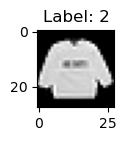

types of batch content: torch.FloatTensor, torch.LongTensor


In [ ]:
map_labels = {
  "0": "T-shirt/top", "1": "Trouser", "2": "Pullover", "3": "Dress",
  "4": "Coat", "5": "Sandal", "6": "Shirt", "7": "Sneaker", "8": "Bag",
  "9": "Ankle boot"
}

ds = FashionMnistDataset(csv_file="~/Data/fashion-mnist/fashion-mnist_train.csv")
print(f"Number of samples in the dataset: {len(ds)}")
X,y = ds[0]

print(f"Shape of image: {X.shape}, corresponding label: {map_labels[str(int(y))]}")
ds.show(0)

dl = torch.utils.data.DataLoader(ds, batch_size=128, shuffle=True)

X, y = next(iter(dl))
print(f"types of batch content: {X.type()}, {y.type()}")

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()